In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the entire assignment
S0 = 100
sigma = 0.2
mu = 0.10
T = 1 # time in years
r = 0.05 # risk-free interest rate
K = 100 # strke price of options at-the-money

# Simulation of Gemoetric Brownian Motion

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$$

Where:
- $S_t$ is the asset price at time $t$
- $\mu$ is the drift (expected return)
- $\sigma$ is the volatility
- $W_t$ is a standard Wiener process
¨

## Solution:
Ito's Lemma and integrate

$$
S_t = S_0 \exp\left[\left( \mu - \frac{1}{2} \sigma^2 \right)t + \sigma W_t \right]
$$

## Approximation:
Euler-Maryuama method
$$
S_{n+1} = S_n + \mu S_n \Delta t + \sigma S_n \sqrt{\Delta t} \cdot ΔW_n
$$




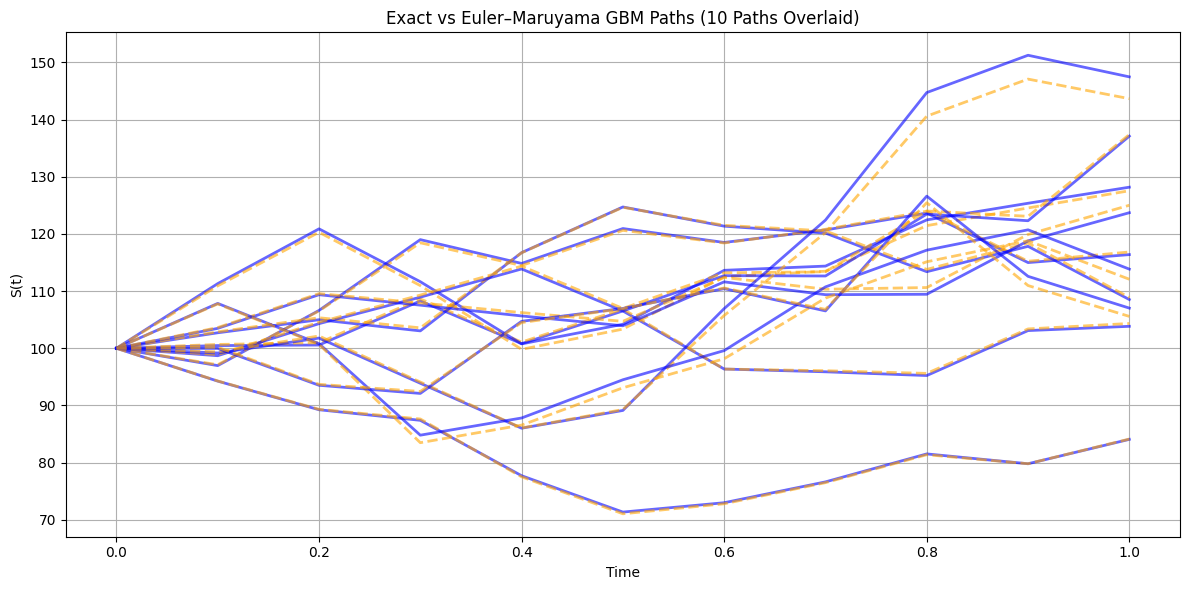

In [2]:
M = 10 # number of paths
spawn_point = 21
np.random.seed(spawn_point)

N = 10
dt = T/N
t = np. linspace(0, T, N+1)
exact_paths = np.zeros((M, N + 1))
euler_paths = np.zeros((M, N + 1))


def generate_brownian_motion(T, N):
    dt = T / N
    increments = np.random.normal(0.0, np.sqrt(dt), size=N)
    return increments, np.concatenate(([0], np.cumsum(increments)))


def euler_maruyama_gbm(S0, mu, sigma, dt, dW):
  N = len(dW)
  S = np.zeros(N+1)
  S[0] = S0
  for n in range(N):
    S[n + 1] = S[n] + mu * S[n] * dt + sigma * S[n] * dW[n]
  return S


def plotter(t, exact_paths, euler_paths):
    """
    Plots all M exact and Euler–Maruyama GBM paths on the same plot for final comparison.

    Parameters:
    - t: Time vector
    - exact_paths: Array of exact GBM paths (M, N+1)
    - euler_paths: Array of Euler paths (M, N+1)
    """
    M = exact_paths.shape[0]

    plt.figure(figsize=(12, 6))

    for i in range(M):
        plt.plot(t, exact_paths[i], color='blue', alpha=0.6, label="Exact", linewidth=2)
        plt.plot(t, euler_paths[i], color='orange', alpha=0.6, linestyle='--', label="Approximation", linewidth=2)

    plt.title(f"Exact vs Euler–Maruyama GBM Paths ({M} Paths Overlaid)")
    plt.xlabel("Time")
    plt.ylabel("S(t)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



for i in range(M):
  dW, W = generate_brownian_motion(T,N)
  exact_paths[i] = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
  euler_paths[i] = euler_maruyama_gbm(S0, mu, sigma, dt, dW)

plotter(t, exact_paths, euler_paths)





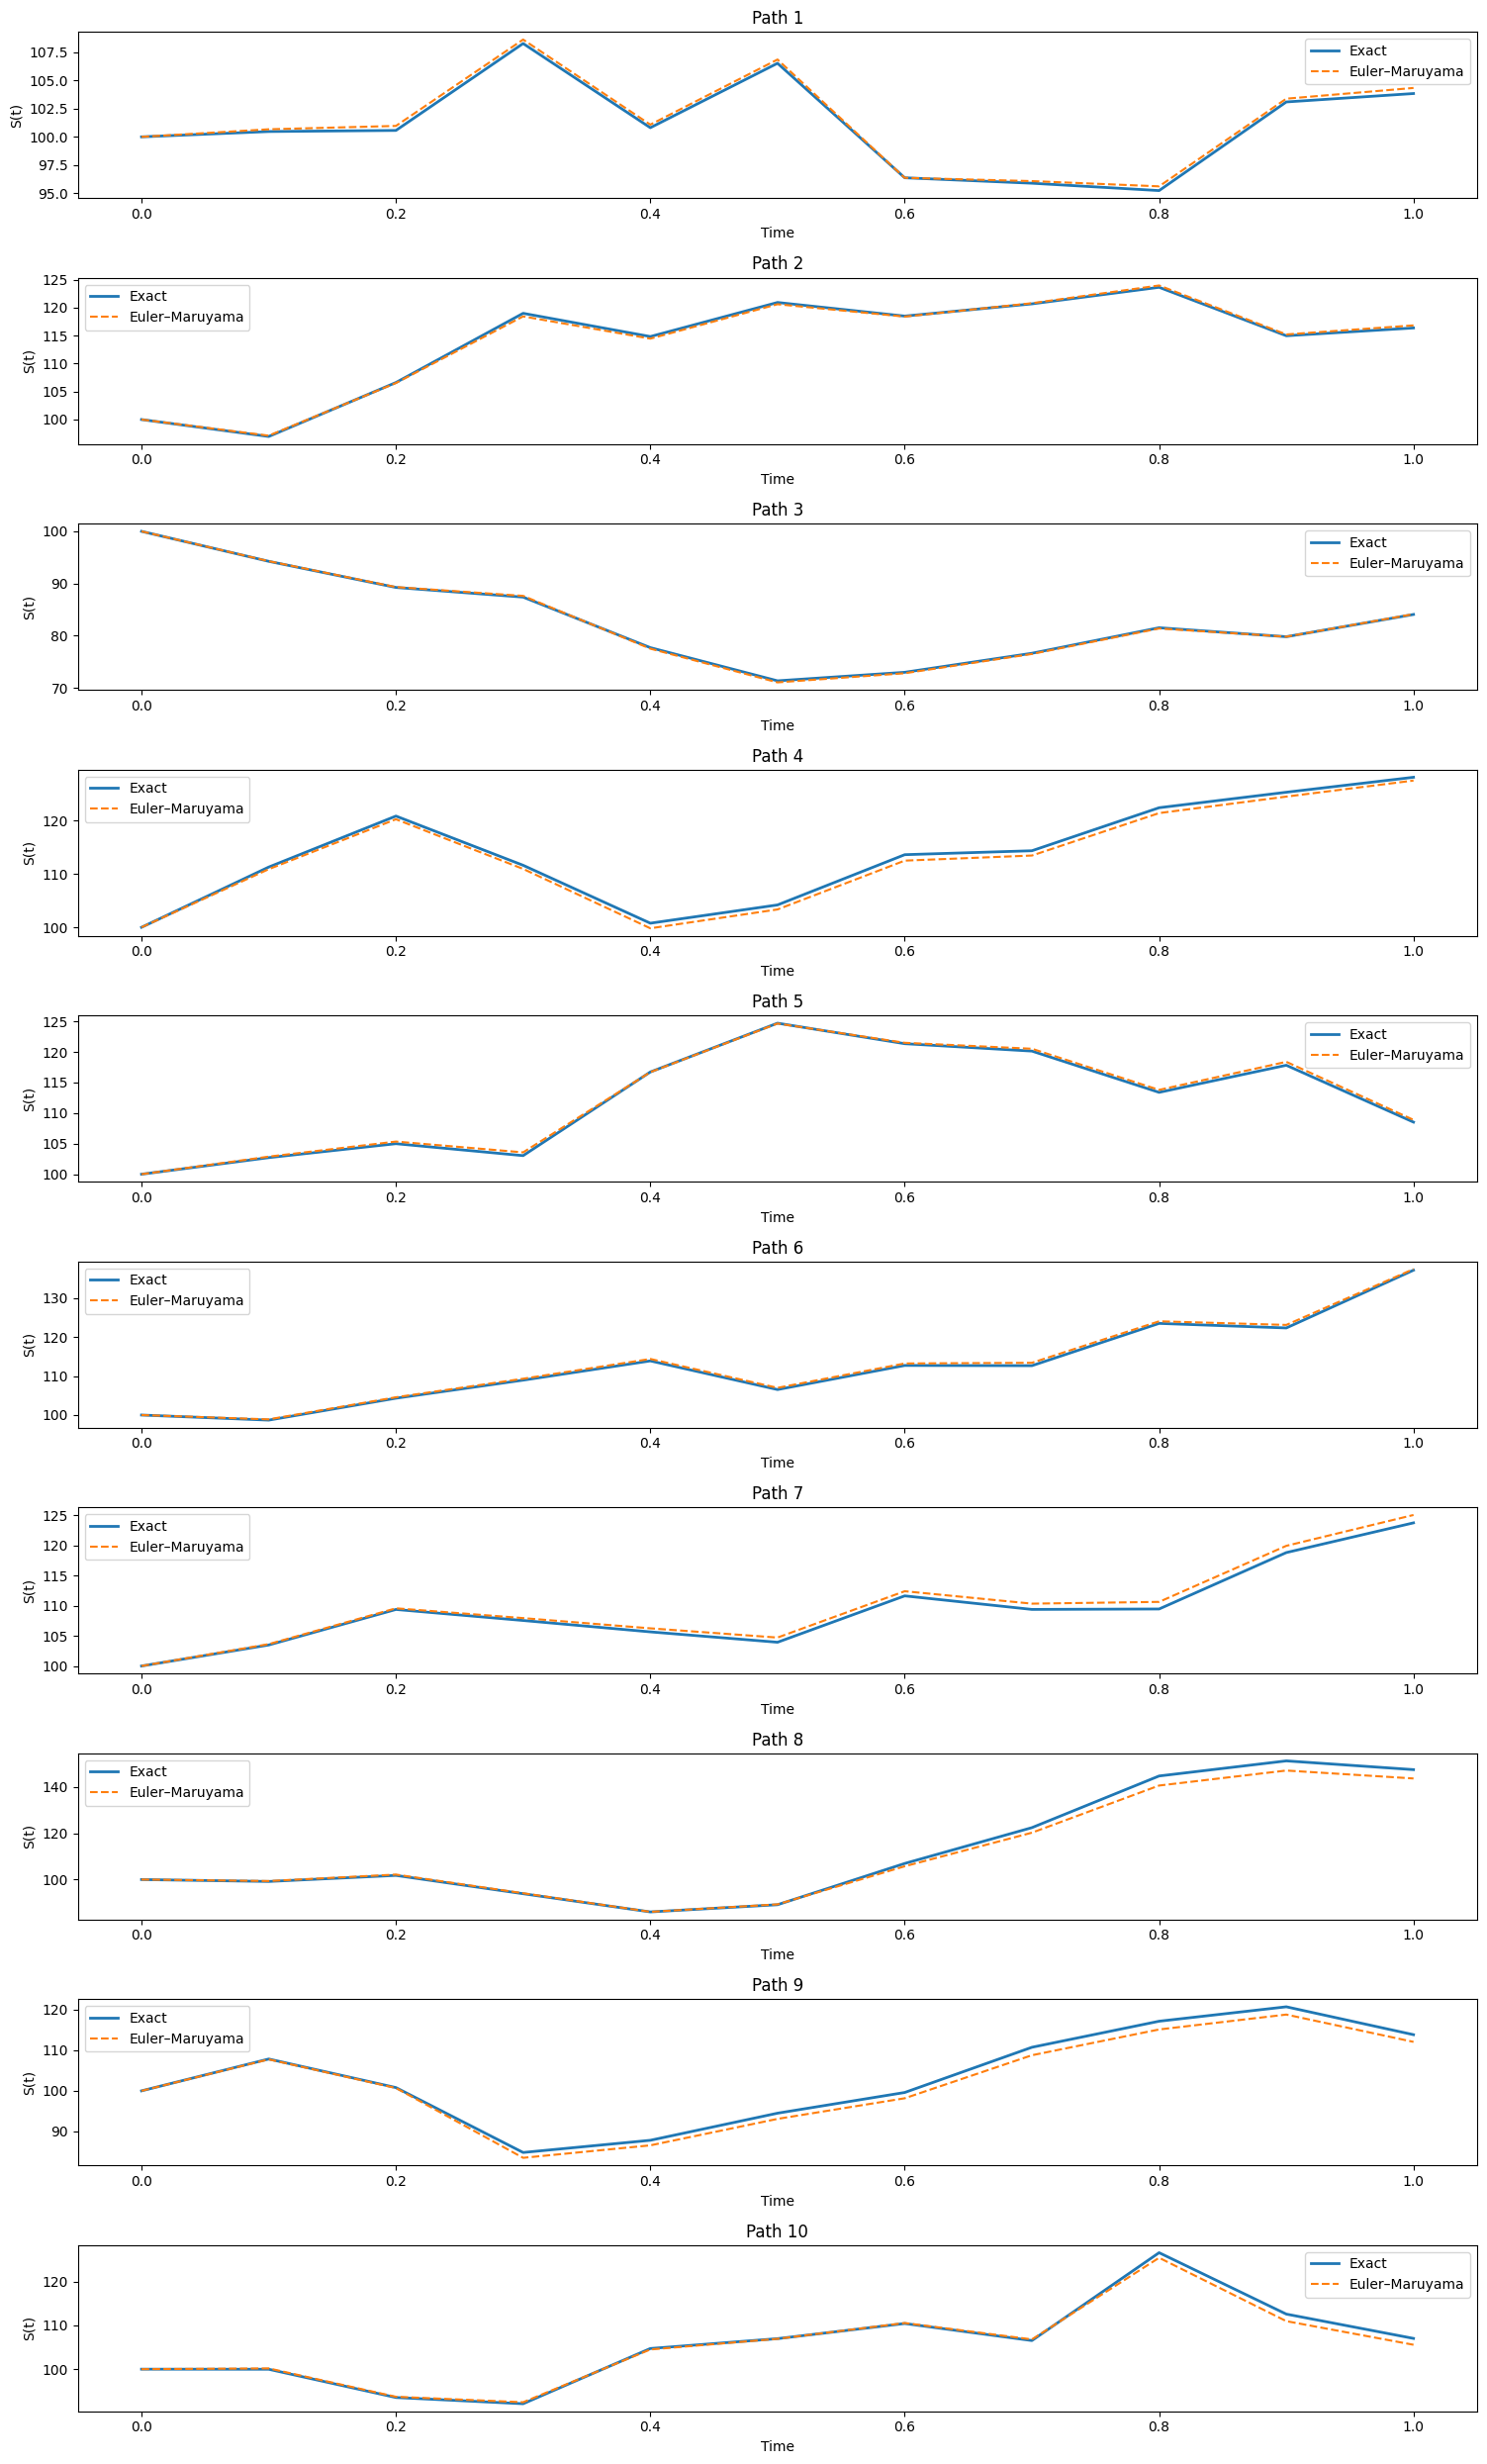

In [3]:

def plotter_compare_one_by_one(t, exact_paths, euler_paths):
    """
    For each path plots exact and EM GBM solution on same plot.
    """

    M = exact_paths.shape[0]

    plt.figure(figsize=(15, M * 2.5))  # One long boy plot right here

    for i in range(M):
        plt.subplot(M, 1, i + 1)
        plt.plot(t, exact_paths[i], label="Exact", linewidth=2)
        plt.plot(t, euler_paths[i], label="Euler–Maruyama", linestyle='--')
        plt.title(f"Path {i + 1}")
        plt.xlabel("Time")
        plt.ylabel("S(t)")
        plt.legend()

    plt.tight_layout()
    plt.show()

plotter_compare_one_by_one(t, exact_paths, euler_paths)


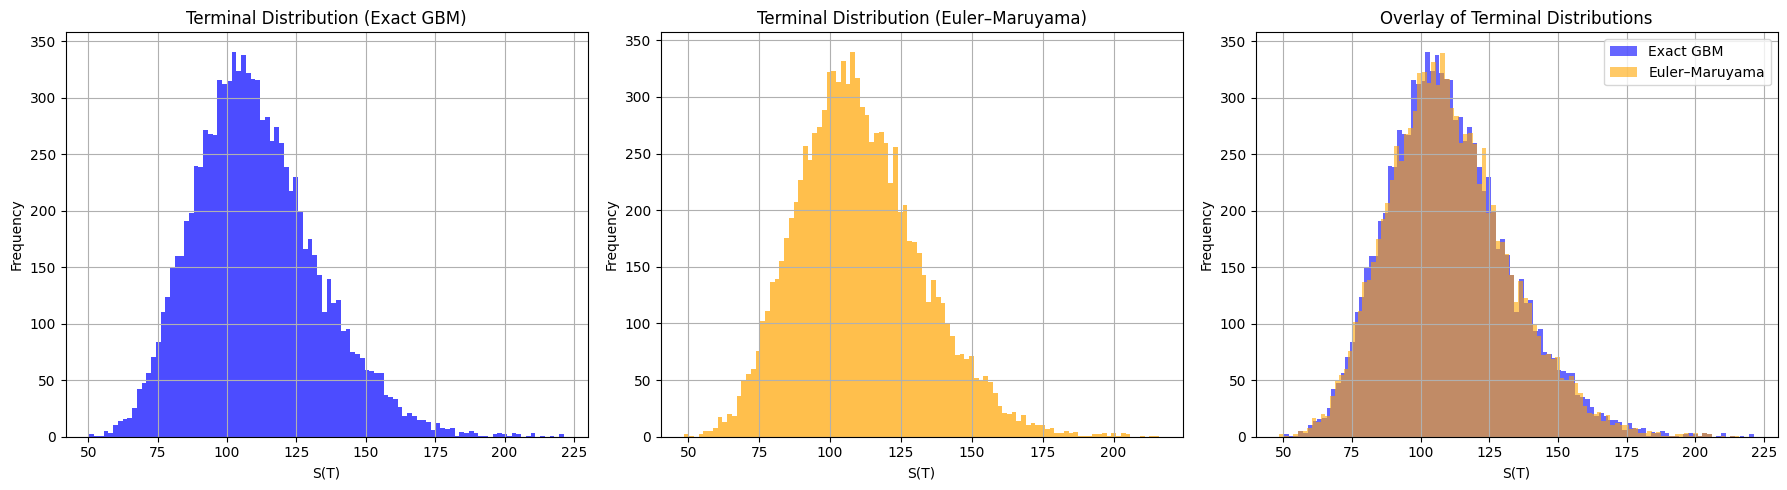

In [4]:
# We need many more paths to see terminal distribution and error
# So copy paste the part above because lazy

M = 10000 # number of paths
spawn_point = 21
np.random.seed(spawn_point)
N = 10
dt = T/N
t = np. linspace(0, T, N+1)
exact_paths = np.zeros((M, N + 1))
euler_paths = np.zeros((M, N + 1))

number_of_bins = 100

for i in range(M):
  dW, W = generate_brownian_motion(T,N)
  exact_paths[i] = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
  euler_paths[i] = euler_maruyama_gbm(S0, mu, sigma, dt, dW)


def plot_terminal_distributions(exact_paths, euler_paths, number_of_bins=30):
    """Plots terminal distribution histograms"""

    # Extract terminal values (S_T)
    exact_final = exact_paths[:, -1]
    euler_final = euler_paths[:, -1]

    plt.figure(figsize=(18, 5))

    # Exact distribution
    plt.subplot(1, 3, 1)
    plt.hist(exact_final, bins=number_of_bins, color='blue', alpha=0.7) # alpha is opacity
    plt.title("Terminal Distribution (Exact GBM)")
    plt.xlabel("S(T)")
    plt.ylabel("Frequency")
    plt.grid(True)

    # Euler–Maruyama distribution
    plt.subplot(1, 3, 2)
    plt.hist(euler_final, bins=number_of_bins, color='orange', alpha=0.7)
    plt.title("Terminal Distribution (Euler–Maruyama)")
    plt.xlabel("S(T)")
    plt.ylabel("Frequency")
    plt.grid(True)

    # Both overlayed
    plt.subplot(1, 3, 3)
    plt.hist(exact_final, bins=number_of_bins, color='blue', alpha=0.6, label="Exact GBM")
    plt.hist(euler_final, bins=number_of_bins, color='orange', alpha=0.6, label="Euler–Maruyama")
    plt.title("Overlay of Terminal Distributions")
    plt.xlabel("S(T)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_terminal_distributions(exact_paths, euler_paths, number_of_bins)



In [5]:
# Need a function for calculating MSE between approximation and exact, so here it is:

def MSE(S0, mu, sigma, T, N, M):
  "MSE vs Euler and exact GBM, I want to make a heat map so I remake this"

  dt = T / N
  mse_values = np.zeros(M)
  for i in range(M):  
    dW, W = generate_brownian_motion(T, N)
    exact = exact_gbm_solution(S0, mu, sigma, T, W)
    euler = euler_maruyama_gbm(S0, mu, sigma, dt, dW)

    mse_values[i] = np.mean((euler - exact) ** 2)


# d)

## Real World Measure

$$ dS_t = \mu S_t \, dt + \sigma S_t \, dW_t $$

$$ \Rightarrow \quad S_t = S_0 e^{(\mu - \frac{1}{2}\sigma^2)t + \sigma W_t} $$


## Under Risk-Neutral Measure

\begin{cases}
dS_t = r S_t \, dt + \sigma S_t \, dW_t^{\mathbb{Q}} \\[6pt]
dW_t^{\mathbb{Q}} = dW_t - \dfrac{r - \mu}{\sigma} \, dt
\end{cases}

$$ \Rightarrow \quad S_t = S_0 e^{(r - \frac{1}{2}\sigma^2)t + \sigma W_t^{\mathbb{Q}}} $$


In [6]:
def get_wt(S0, mu, sigma, T, N, M):
  rng = np.random.default_rng(4)
  dt = T / N
  dW = rng.normal(0, np.sqrt(dt), size=(N, M))
  return dW

def simulate_st_under_P(S0, mu, sigma, T, N, t, M):
  dt = T / N
  dW = get_wt(S0, mu, sigma, T, N, M)
  W = np.cumsum(dW, axis = 0)
  st = np.exp(-r*t) * S0 * np.exp((mu - sigma**2 / 2) * t + sigma * W)
  return st, W

def simulate_st_under_Q(S0, r, mu, sigma, T, N, t, M):
  dt = T / N
  dW_q = get_wt(S0, mu, sigma, T, N, M)
  W_q = np.cumsum(dW_q, axis = 0)
  st = np.exp(-r*t) * S0 * np.exp((r - sigma**2 / 2) * t + sigma * W_q)
  return st, W_q

def plot_different_measures(S0, r, mu, sigma, T, N, M):
  t = np.linspace(0, T, N)
  t = t[:, None]
  exact_real_world, _ = simulate_st_under_P(S0, mu, sigma, T, N, t, M)
  exact_risk_neutral, _ = simulate_st_under_Q(S0, r, mu, sigma, T, N, t, M)
  plt.figure(figsize=(10, 5))
    # Plot all real-world paths, label only the first one
  for i in range(M):
      if i == 0:
            plt.plot(t, exact_real_world[:, i], color="blue", label="Real World", alpha=0.2)
      else:
            plt.plot(t, exact_real_world[:, i], color="blue", alpha=0.2)

    # Plot all risk-neutral paths, label only the first one
  for i in range(M):
      if i == 0:
            plt.plot(t, exact_risk_neutral[:, i], color="orange", label="Risk Neutral", alpha=0.2)
      else:
            plt.plot(t, exact_risk_neutral[:, i], color="orange", alpha=0.2)
  plt.xlabel("Time")
  plt.ylabel("Asset Price $S_t$")
  plt.title("Simulated GBM Paths under Real-World and Risk-Neutral Measures")
  plt.legend()
  plt.show()

  # --- Plot histogram of terminal values ---
  ST_real = exact_real_world[-1, :]   # final values at T
  ST_risk = exact_risk_neutral[-1, :] # final values at T

  plt.figure(figsize=(9, 5))
  plt.hist(ST_real, bins=40, alpha=0.6, color="blue", label="Real World $S_T$")
  plt.hist(ST_risk, bins=40, alpha=0.6, color="orange", label="Risk Neutral $S_T$")
  plt.axvline(ST_real.mean(), color="blue", linestyle="--")
  plt.axvline(ST_risk.mean(), color="orange", linestyle="--")
  plt.xlabel("Terminal Discounted Price $S_T$")
  plt.ylabel("Frequency")
  plt.title("Distribution of Final Asset Prices $S_T$")
  plt.legend()
  plt.show()

In [7]:
# Parameters for the entire assignment
S0 = 100
sigma = 0.2
mu = 0.10
T = 1 # time in years
r = 0.05 # risk-free interest rate
K = 100 # strke price of options at-the-money
M = 5000 # number of paths
N = 100 # number of time steps

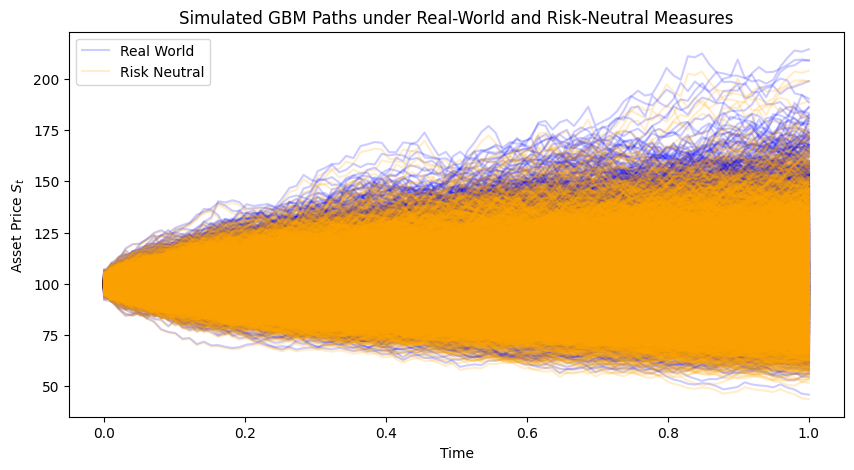

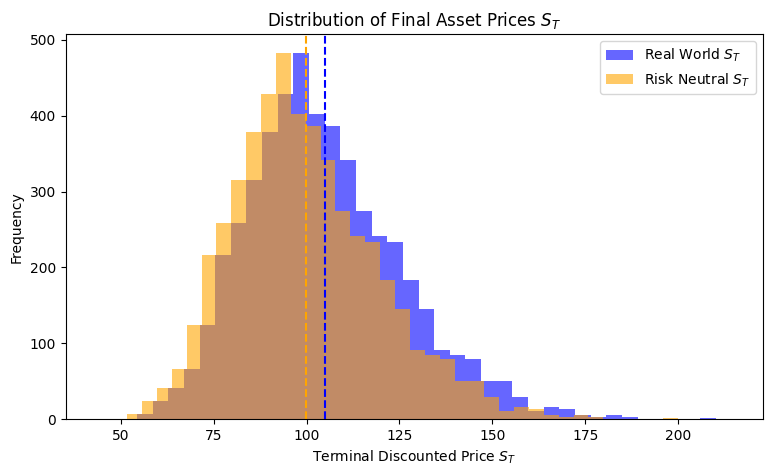

In [8]:
plot_different_measures(S0, r, mu, sigma, T, N, M) # discounted prices

The risk neutral measure makes the risky asset / risk free asset a martingale. Under the real world measure, there is a bigger drift which makes the price be higher in the end.

The connection to Grisanov's theoreme is that the change of measure is made with the Grisanov's theoreme. We choose theta so St/Bt is a martingale. 

Let 

$$
\theta_t = \frac{\mu - r}{\sigma}.
$$

As $\theta_t$ is time-invariant, **Novikov’s condition** is satisfied.

We define the **exponential martingale**:

$$
Z_t = \exp\left( -\int_0^t \theta_s \, dW_s - \frac{1}{2} \int_0^t \theta_s^2 \, ds \right).
$$

Since $\theta_t$ is constant, this simplifies to:

$$
Z_t = \exp\left( -\theta W_t - \frac{1}{2} \theta^2 t \right).
$$

We define a new probability measure $\mathbb{Q}$ on $(\Omega, \mathcal{F}_T)$ by

$$
\frac{d\mathbb{Q}}{d\mathbb{P}} = Z_T.
$$

This $Z_T$ is the **Radon–Nikodym derivative**.

Let $X = \psi(S_T)$ be a **payoff** for an option.  
The **option price** is given by

$$
\pi_0(X) = \mathbb{E}^{\mathbb{Q}}\left[ e^{-rT} \psi(S_T) \right].
$$

We change to the **real-world measure** $\mathbb{P}$:

$$
\pi_0(X) = \mathbb{E}^{\mathbb{P}}\left[ e^{-rT} \psi(S_T) Z_T \right].
$$

In [27]:
def get_wt(T, N, M, rng=None):  
  dt = T / N
  dW = rng.normal(0.0, np.sqrt(dt), size=(N, M))
  return dW

def simulate_st_under_P(S0, mu, sigma, T, N, t, M,rng=None):
  dt = T / N
  dW = get_wt(T, N, M, rng)
  W = np.cumsum(dW, axis = 0)
  st = S0 * np.exp((mu - sigma**2 / 2) * t + sigma * W)
  return st, W

def simulate_st_under_Q(S0, r, mu, sigma, T, N, t, M,rng=None):
  dW_q = get_wt(T, N, M, rng)
  W_q = np.cumsum(dW_q, axis = 0)
  st = S0 * np.exp((r - sigma**2 / 2) * t + sigma * W_q)
  return st, W_q

def price_call_reweight_P_to_Q(S0, K, mu, r, sigma, T, M, N,rng=None):

    t = np.linspace(0, T, N)
    t = t[:, None]

    S_P, W = simulate_st_under_P(S0, mu, sigma, T, N, t, M,rng)
    ST = S_P[-1, :]                                # (M,)
    W_T = W[-1, :]                                 # (M,)

    theta = (mu - r)/sigma
    Z_T = np.exp(-theta * W_T - 0.5 * theta**2 * T)

    disc_payoff = np.exp(-r*T) * np.maximum(ST - K, 0.0) * Z_T
    return disc_payoff.mean()

def price_call_direct_Q(S0, K, mu, r, sigma, T, M, N,rng=None):
    t = np.linspace(0, T, N)
    t = t[:, None]

    S_Q, _ = simulate_st_under_Q(S0, r, mu, sigma, T, N, t, M,rng)
    ST_Q = S_Q[-1, :]

    disc_payoff = np.exp(-r*T) * np.maximum(ST_Q - K, 0.0)
    return disc_payoff.mean()

def _summarize(x):
    mean = x.mean()
    std  = x.std(ddof=1)
    return mean, std

def plot_call_prices(S0, K, mu, r, sigma, T, M, N):

    prices_Q = np.zeros(100)
    prices_P = np.zeros(100)

    for i in range(100):
        rng = np.random.default_rng(i*1000)
        prices_P[i] = price_call_reweight_P_to_Q(S0, K, mu, r, sigma, T, M, N, rng)
        prices_Q[i] = price_call_direct_Q(S0, K, mu, r, sigma, T, M, N, rng)

    # stats
    mean_P, std_P = _summarize(prices_P)
    mean_Q, std_Q = _summarize(prices_Q)

    # print stats
    print(f"Reweighted P→Q: mean={mean_P:.6f}, std={std_P:.6f}")
    print(f"Direct under Q: mean={mean_Q:.6f}, std={std_Q:.6f}")

    # plot series + annotate with stats
    plt.figure(figsize=(10, 5))
    plt.plot(prices_P, label="Reweighted P→Q")
    plt.plot(prices_Q, label="Price under Q")
    plt.xlabel("Replication index (100 runs)")
    plt.ylabel("Call price")
    plt.title(
        f"P→Q mean={mean_P:.4f} (sd={std_P:.4f}) | "
        f"Q mean={mean_Q:.4f} (sd={std_Q:.4f})"
    )
    plt.legend()
    plt.tight_layout()
    plt.show()

In [28]:
# Parameters for the entire assignment
S0 = 100
sigma = 0.2
mu = 0.10
T = 1 # time in years
r = 0.05 # risk-free interest rate
K = 100 # strke price of options at-the-money
M = 1000 # number of paths
N = 100 # number of time steps

Reweighted P→Q: mean=10.443927, std=0.317406
Direct under Q: mean=10.430807, std=0.516468


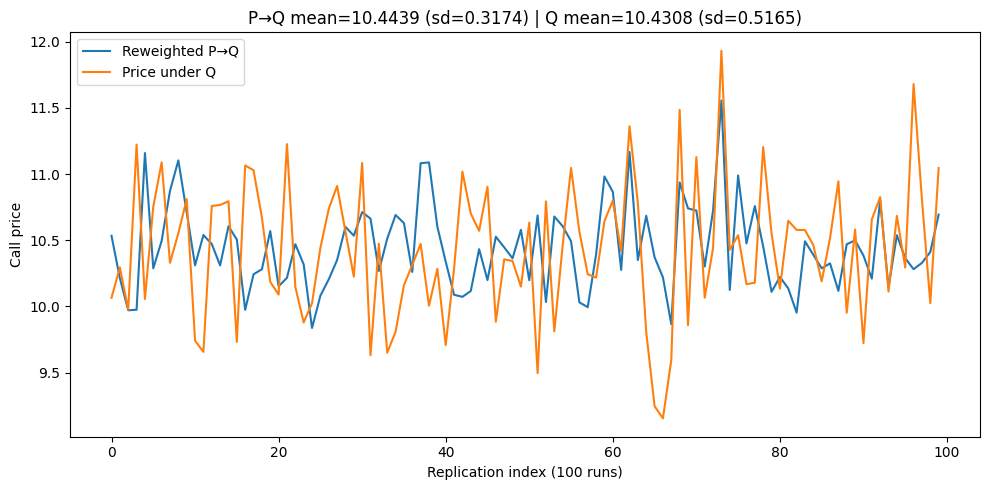

In [29]:
plot_call_prices(S0, K, mu, r, sigma, T, M, N)

# g)